In [1]:
import sys
sys.path.append('.')
sys.path.append('..')

import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import numpy.random as npr
import numpy as np
import seaborn as sns
from matplotlib import animation

from SellkeSimulation.DynamicNetworks import dynamic_stochastic_block_model
from SellkeSimulation.Simulation import complex_epidemic_simulation

In [2]:
sizes = [10,10]
probs = [[0.9,0.025],[0.025,0.9]]
migration = [[1,0],[0,1]]
my_dynamic_sbm = dynamic_stochastic_block_model(sizes = sizes, p = probs, m = migration, waiting_time_par = 100, end_time = 100)

In [3]:
my_network_epidemic = complex_epidemic_simulation(my_dynamic_sbm.G,
                                                  beta = 0.5,
                                                  I_parameters = 1.5,
                                                  initial_infected = 1,
                                                  time_increment = 0.1,
                                                  max_iterations = 1000,
                                                  SIS = True,
                                                  increment_network = my_dynamic_sbm.increment_network)
my_network_epidemic.iterate_epidemic()

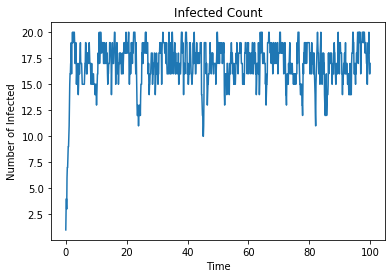

In [4]:
infected = my_network_epidemic.data_infected_counts
time = my_network_epidemic.data_time
plt.title("Infected Count")
plt.xlabel("Time")
plt.ylabel("Number of Infected")
plt.plot(time, infected)
plt.savefig("Epidemic_1.png")

C:\Users\mfyles\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


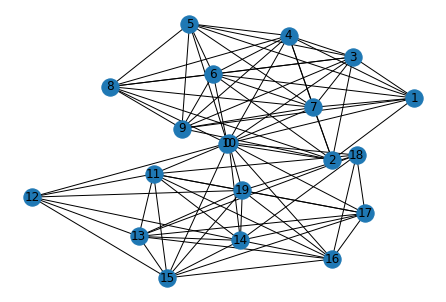

In [5]:
nx.draw_kamada_kawai(my_dynamic_sbm.G, with_labels = True)

In [6]:
def get_color_map(i):
    color_map = []
    susceptible_nodes = my_network_epidemic.data_susceptible_nodes[i]
    infected_nodes = my_network_epidemic.data_infected_nodes[i]
    recovered_nodes = my_network_epidemic.data_recovered_nodes[i]
    for node in my_network_epidemic.G:
        if node in infected_nodes:
            color_map.append('green')
        elif node in susceptible_nodes: color_map.append('blue')
            
    return color_map

In [7]:
def simple_update(num, layout, G, ax):
    ax.clear()
    
    prev_layout = nx.kamada_kawai_layout(my_network_epidemic.G)
    
    #Choose which node to update, then move it
    my_network_epidemic.perform_iteration()
    
    new_layout = nx.kamada_kawai_layout(my_network_epidemic.G, pos = prev_layout)
    
    color_map = get_color_map(num)
    
    nx.draw(my_network_epidemic.G, pos=new_layout, node_color=color_map, with_labels = True)

    # Set the title
    ax.set_title("Update {}".format(num))
    
def simple_animation():

    G = my_network_epidemic.G
    # Build plot
    fig, ax = plt.subplots(figsize=(6,4))

    # Create a graph and layout
    layout = nx.kamada_kawai_layout(my_network_epidemic.G)

    ani = animation.FuncAnimation(fig, simple_update, 200, fargs=(layout, G, ax))
    ani.save('epidemic_on_dynamic_sbm.gif', writer='imagemagick')

In [12]:
%%capture
my_dynamic_sbm = dynamic_stochastic_block_model(sizes = sizes, p = probs, m = migration, waiting_time_par = 10, end_time = 100)

my_network_epidemic = complex_epidemic_simulation(my_dynamic_sbm.G,
                                                  beta = 0.4,
                                                  I_parameters = 1.5,
                                                  initial_infected = 1,
                                                  time_increment = 0.1,
                                                  max_iterations = 1000,
                                                  SIS = True,
                                                  increment_network = my_dynamic_sbm.increment_network)
simple_animation()

![SegmentLocal](epidemic_on_dynamic_sbm.gif "segment")